In [3]:
!pip install missingno 
# missing data no, 결측치의 패턴을 쉽게 파악할 수 있도록 하는 라이브러리

In [4]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 


import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import zipfile
import datetime as dt
import missingno as msno
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime, date, time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

plt.rc('font', family='malgun gothic')    # 한글처리
plt.rcParams['axes.unicode_minus']=False  # '- 표시

plt.rcParams['figure.dpi'] = 140  # 그림의 해상도

In [34]:
df = pd.read_csv('Data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [36]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [37]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


<Axes: >

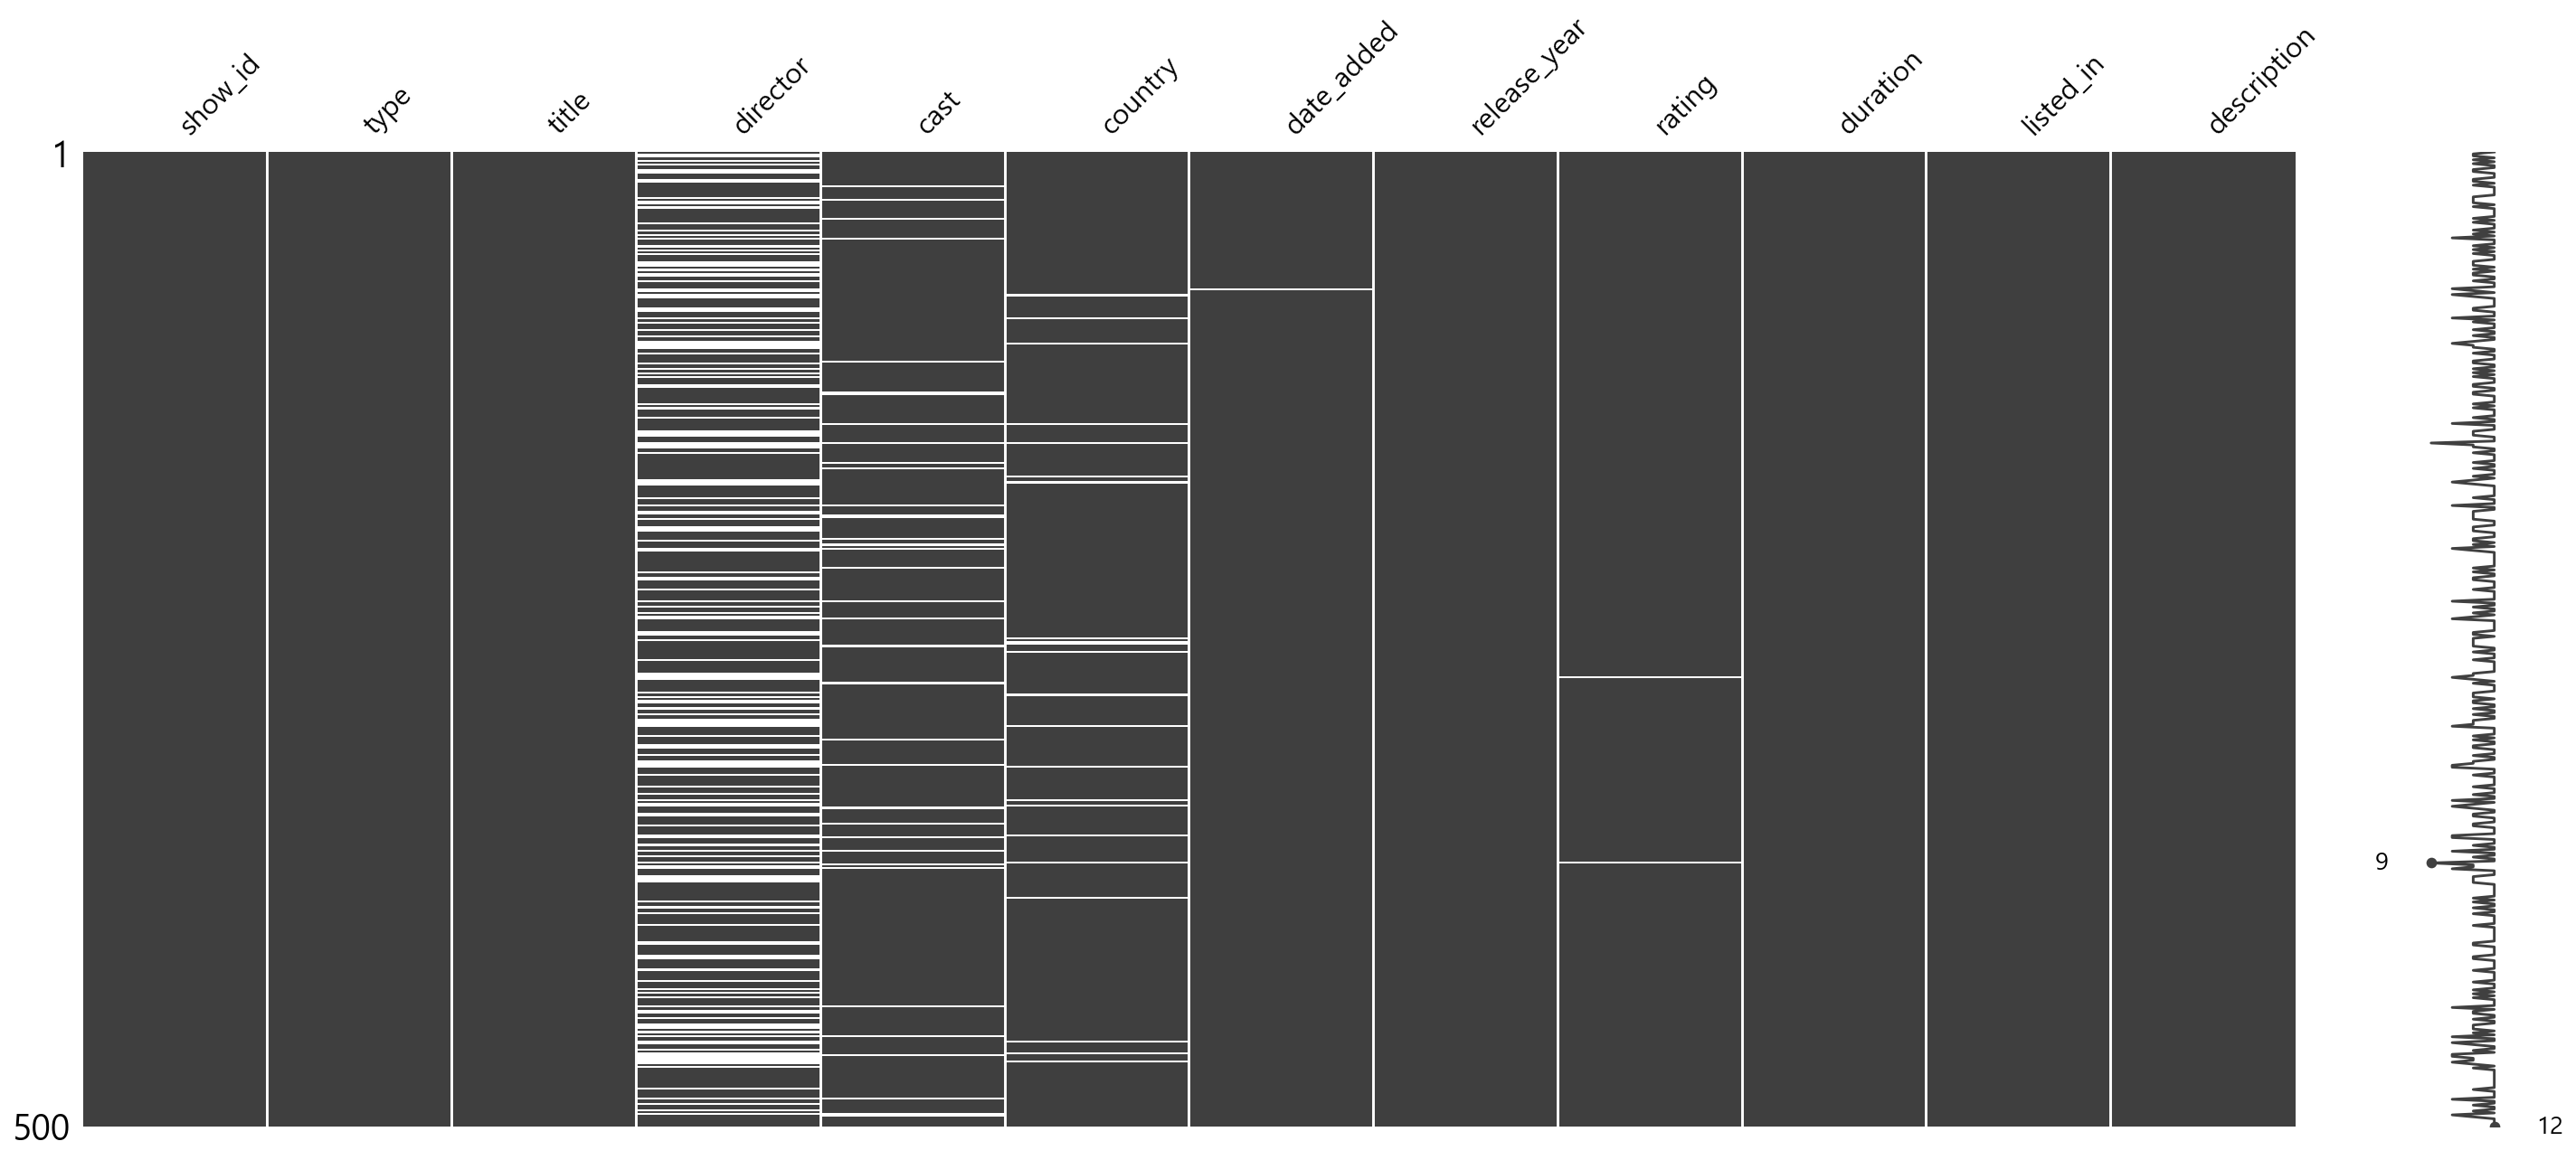

In [38]:
msno.matrix(df.sample(500)) 
#전체중에 무작위 500개 선정 500ㅇ르 없애면 전체가 됨
# 흰색이 결측치, 검은색은 OK

<Axes: >

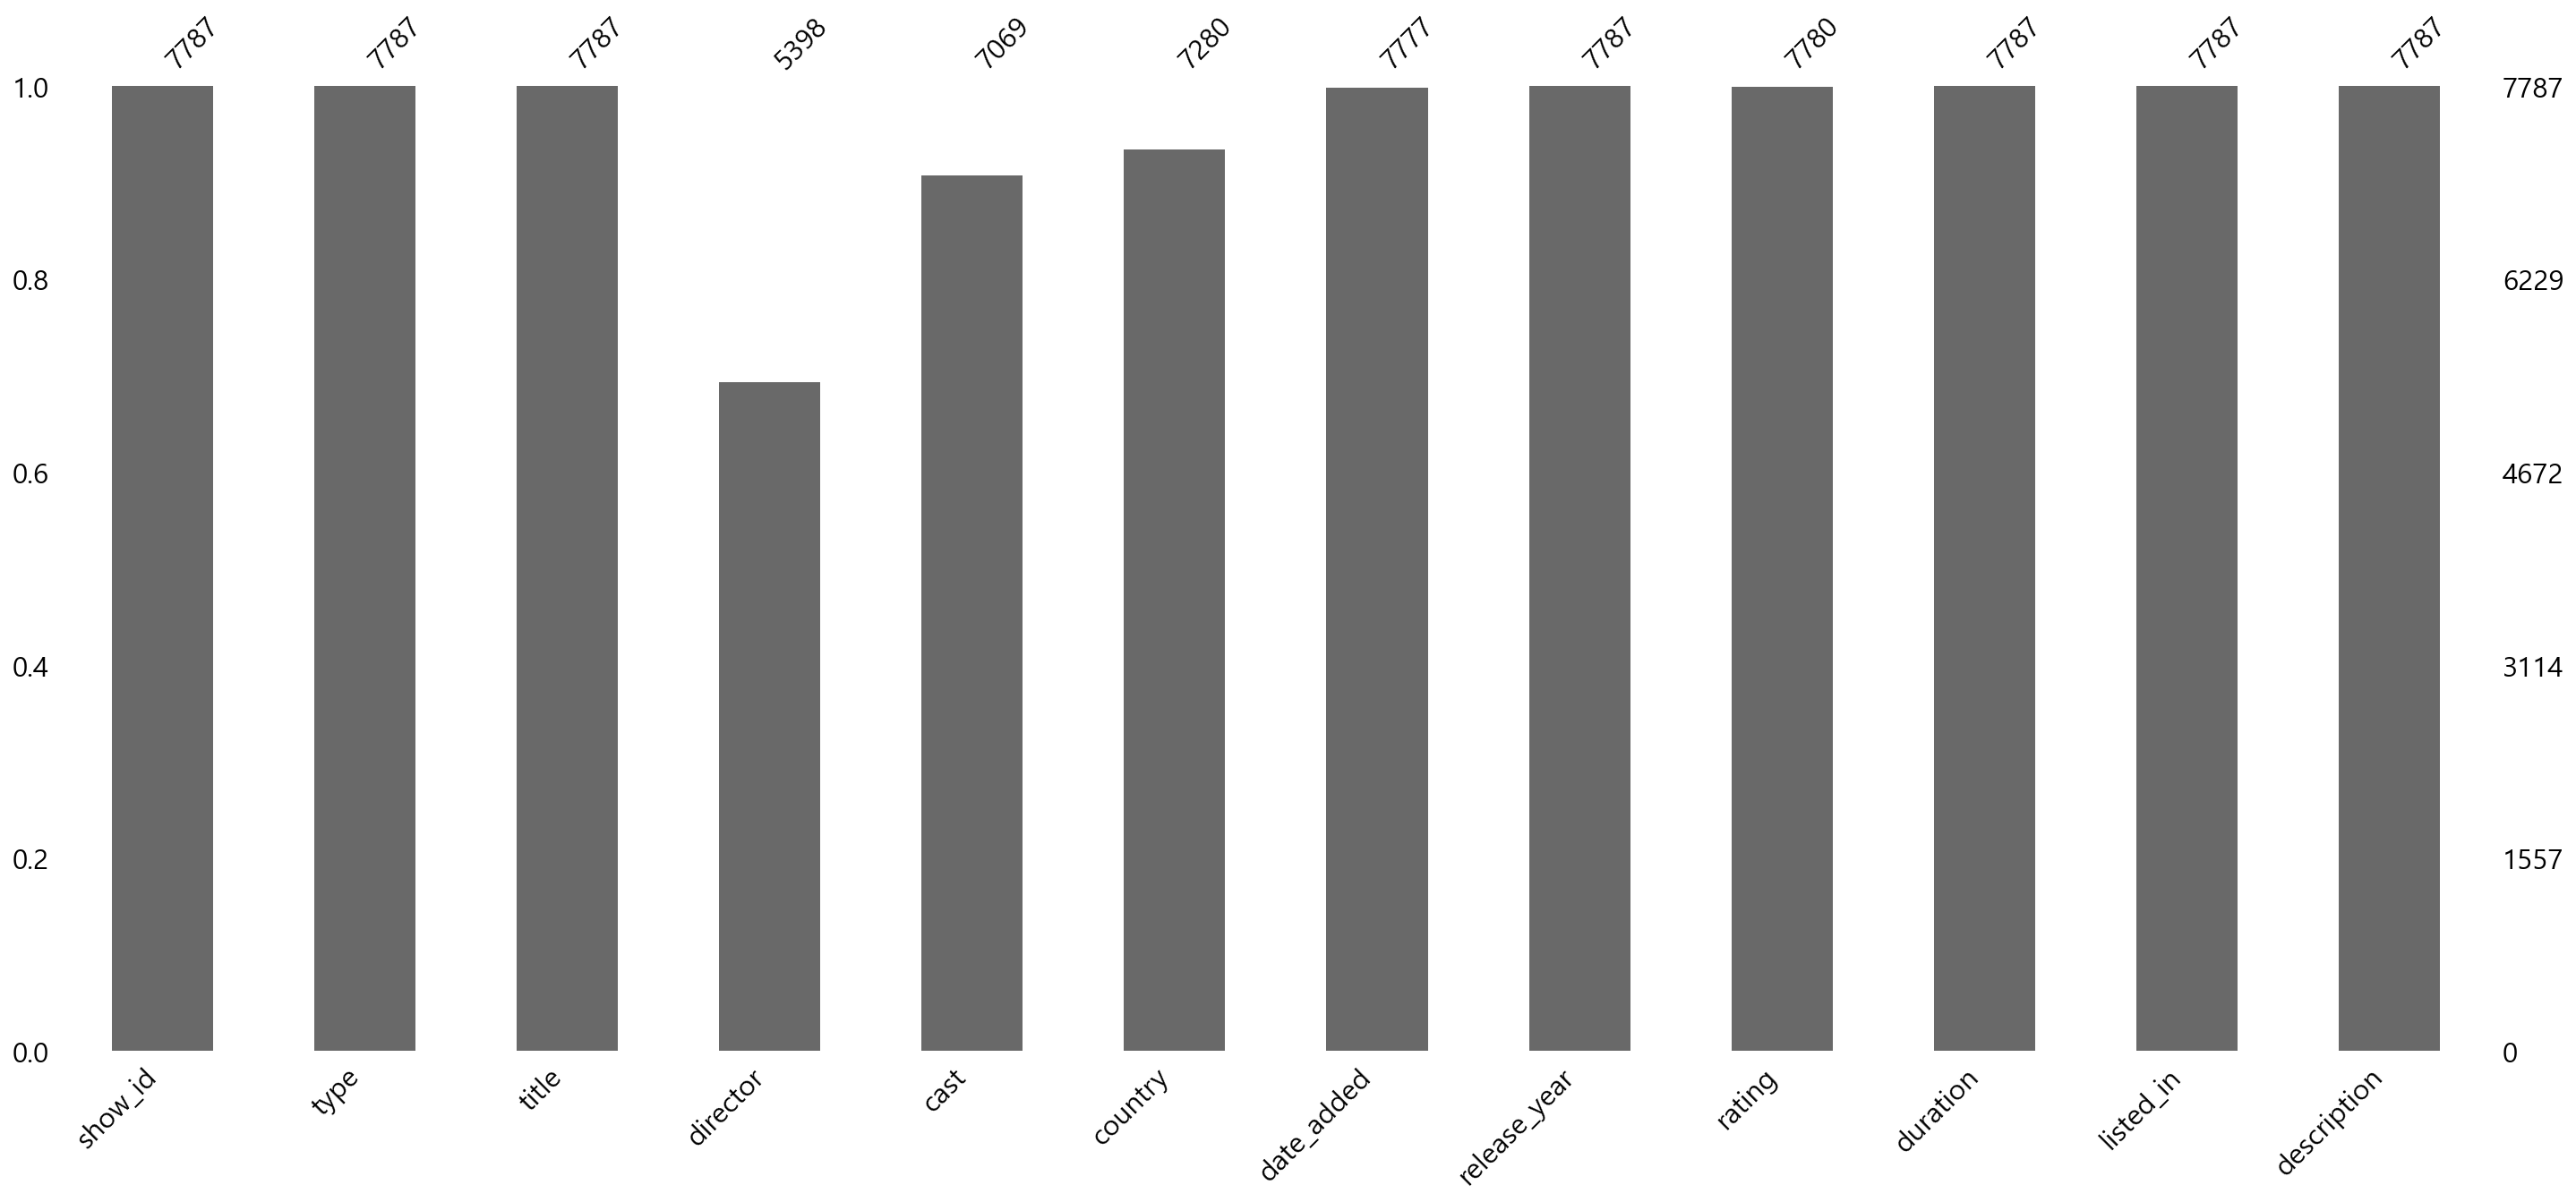

In [39]:
msno.bar(df)

In [40]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [41]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
# 결측치를 해당열의 최빈값으로 대체

In [42]:
df.info() #최빈값이 list형으로 return되기 때문에 첫번째의미로 [0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7787 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [43]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country            0
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [44]:
df['cast'].replace(np.nan, 'Missing', inplace = True)
df.info() #cast결측치를 Missing으로 대체

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [45]:
df['director'].replace(np.nan, 'Missing', inplace = True)
df.info() #director결측치를 Missing으로 대체

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [46]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [47]:
df.dropna(inplace = True)
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


In [49]:
df.drop_duplicates(inplace=True) ##중복 데이터 제거

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


In [51]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [52]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [53]:
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce') 
#datetiem형식으로 변환, 변환중 오류 발생시 NaT로 설정
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7682 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.1+ KB


In [54]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [55]:
print(pd.__version__)

2.0.3


In [56]:
!pip install pandas==1.5.3

In [57]:
df.dropna(inplace = True)
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7682 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7682 non-null   object        
 1   type          7682 non-null   object        
 2   title         7682 non-null   object        
 3   director      7682 non-null   object        
 4   cast          7682 non-null   object        
 5   country       7682 non-null   object        
 6   date_added    7682 non-null   datetime64[ns]
 7   release_year  7682 non-null   int64         
 8   rating        7682 non-null   object        
 9   duration      7682 non-null   object        
 10  listed_in     7682 non-null   object        
 11  description   7682 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 780.2+ KB


In [59]:
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018


In [60]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,10,October,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019
7784,s7785,Movie,Zulu Man in Japan,Missing,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",9,September,2020
7785,s7786,TV Show,Zumbo's Just Desserts,Missing,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,10,October,2020
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Missing,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,3,March,2020


In [62]:
df['country_1'] = df['country'].apply(lambda x: x.split(',')[0])
df['country_1'].tail()

7782            Sweden
7783             India
7784     United States
7785         Australia
7786    United Kingdom
Name: country_1, dtype: object

In [63]:
df['country_1']

0               Brazil
1               Mexico
2            Singapore
3        United States
4        United States
             ...      
7782            Sweden
7783             India
7784     United States
7785         Australia
7786    United Kingdom
Name: country_1, Length: 7682, dtype: object

In [64]:
df['country_1'].replace('United States','USA', inplace = True )
df['country_1'].replace('United Kingdom','UK', inplace = True )
df['country_1'].replace('South Korea','S.Korea', inplace = True )
df['country_1'].tail()

7782       Sweden
7783        India
7784          USA
7785    Australia
7786           UK
Name: country_1, dtype: object

In [65]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [67]:
ratings_ages = {
    'TV-MA': 'Adults',
    'R': 'Adults',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'TV-PG': 'Older Kids',
    'NR': 'Adults',
    'TV-G': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'NC-17': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'UR': 'Adults'
}

df['target_user'] = df['rating'].replace(ratings_ages)
df['target_user'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [68]:
df.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,country_1,target_user
7784,s7785,Movie,Zulu Man in Japan,Missing,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",9,September,2020,USA,Adults
7785,s7786,TV Show,Zumbo's Just Desserts,Missing,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,10,October,2020,Australia,Older Kids
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Missing,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,3,March,2020,UK,Adults


In [69]:
df['duration'].unique()[:10] #상영시간 앞에서 10개

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min'], dtype=object)

In [70]:
df['season_count'] = df.apply(lambda x: x['duration'].split(' ')[0] if 'Season' in x['duration'] else'', axis = 1 )
df['season_count'].unique()

array(['4', '', '1', '2', '3', '5', '9', '8', '6', '7', '13', '12', '10',
       '16', '11', '15'], dtype=object)

In [71]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,country_1,target_user,season_count
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020,Brazil,Adults,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016,Mexico,Adults,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018,Singapore,Adults,


In [73]:
df['duration'] = df.apply(lambda x: x['duration'].split(' ')[0] if 'Season' not in x['duration'] else '', axis = 1 )
df['duration'].unique()[:10]

array(['', '93', '78', '80', '123', '95', '119', '118', '143', '103'],
      dtype=object)

In [74]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,country_1,target_user,season_count
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020,Brazil,Adults,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016,Mexico,Adults,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018,Singapore,Adults,


In [75]:
df['season_count'].replace('',np.nan, inplace = True)
df['duration'].replace('',np.nan, inplace = True)
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,country_1,target_user,season_count
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020,Brazil,Adults,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016,Mexico,Adults,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018,Singapore,Adults,NaN


In [76]:
df['genre'] = df['listed_in'].apply(lambda x: x.replace(' ,',',').replace(', ',',').split(','))
#listed_in 열에서 장르 정보를 추출하여 Genre열에 list형태로 저장
#코마와 콤마 사이네 공백이 있으면 제거하고, 콤마기준으로 분리

In [77]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,country_1,target_user,season_count,genre
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020,Brazil,Adults,4,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016,Mexico,Adults,NaN,"[Dramas, International Movies]"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018,Singapore,Adults,NaN,"[Horror Movies, International Movies]"


In [78]:
df.dtypes

show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
month_added                  int32
month_name_added            object
year_added                   int32
country_1                   object
target_user                 object
season_count                object
genre                       object
dtype: object

In [80]:
df['type'] = pd.Categorical(df['type'])
df['target_user'] = pd.Categorical(df['target_user'], categories = ['Kids', 'Older Kids', 'Teens', 'Adults'])
df['duration'] = pd.to_numeric(df['duration'])
df['year_added'] = df['year_added'].astype(int)

In [81]:
df.dtypes

show_id                     object
type                      category
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                   float64
listed_in                   object
description                 object
month_added                  int32
month_name_added            object
year_added                   int32
country_1                   object
target_user               category
season_count                object
genre                       object
dtype: object

In [85]:
df_tv = df[df['type'] == 'TV Show']
df_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,country_1,target_user,season_count,genre
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020,Brazil,Adults,4,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,7,July,2017,Turkey,Adults,1,"[International TV Shows, TV Dramas, TV Mysteries]"
11,s12,TV Show,1983,Missing,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",11,November,2018,Poland,Adults,1,"[Crime TV Shows, International TV Shows, TV Dr..."
12,s13,TV Show,1994,Diego Enrique Osorno,Missing,Mexico,2019-05-17,2019,TV-MA,NaN,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,5,May,2019,Mexico,Adults,1,"[Crime TV Shows, Docuseries, International TV ..."
16,s17,TV Show,Feb-09,Missing,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,2019-03-20,2018,TV-14,NaN,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",3,March,2019,USA,Teens,1,"[International TV Shows, TV Dramas]"


In [86]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2310 entries, 0 to 7785
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           2310 non-null   object        
 1   type              2310 non-null   category      
 2   title             2310 non-null   object        
 3   director          2310 non-null   object        
 4   cast              2310 non-null   object        
 5   country           2310 non-null   object        
 6   date_added        2310 non-null   datetime64[ns]
 7   release_year      2310 non-null   int64         
 8   rating            2310 non-null   object        
 9   duration          0 non-null      float64       
 10  listed_in         2310 non-null   object        
 11  description       2310 non-null   object        
 12  month_added       2310 non-null   int32         
 13  month_name_added  2310 non-null   object        
 14  year_added        2310 non-nu

In [87]:
df_movie = df[df['type'] == 'Movie']
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5372 entries, 1 to 7786
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           5372 non-null   object        
 1   type              5372 non-null   category      
 2   title             5372 non-null   object        
 3   director          5372 non-null   object        
 4   cast              5372 non-null   object        
 5   country           5372 non-null   object        
 6   date_added        5372 non-null   datetime64[ns]
 7   release_year      5372 non-null   int64         
 8   rating            5372 non-null   object        
 9   duration          5372 non-null   float64       
 10  listed_in         5372 non-null   object        
 11  description       5372 non-null   object        
 12  month_added       5372 non-null   int32         
 13  month_name_added  5372 non-null   object        
 14  year_added        5372 non-nu

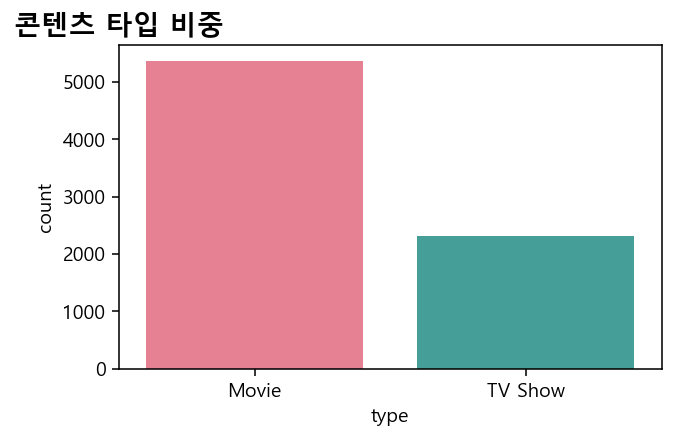

In [90]:
plt.figure(figsize = (5,3))

sns.countplot(x='type', data = df, palette = 'husl')
# sns.despine(left = True) # 그래프의 테두리 삭제
plt.title('콘텐츠 타입 비중', fontsize = 14, fontweight = 'bold', position = (0,0))
plt.show()

# Seaborn 컬러 팔레트 선택 :
# https://seaborn.pydata.org/tutorial/color_palettes.html

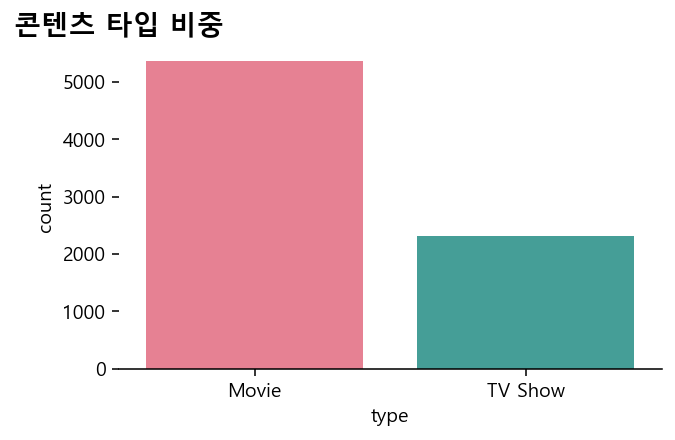

In [91]:
plt.figure(figsize = (5,3))

sns.countplot(x='type', data = df, palette = 'husl')
sns.despine(left = True) # 그래프의 테두리 삭제
plt.title('콘텐츠 타입 비중', fontsize = 14, fontweight = 'bold', position = (0,0))
plt.show()

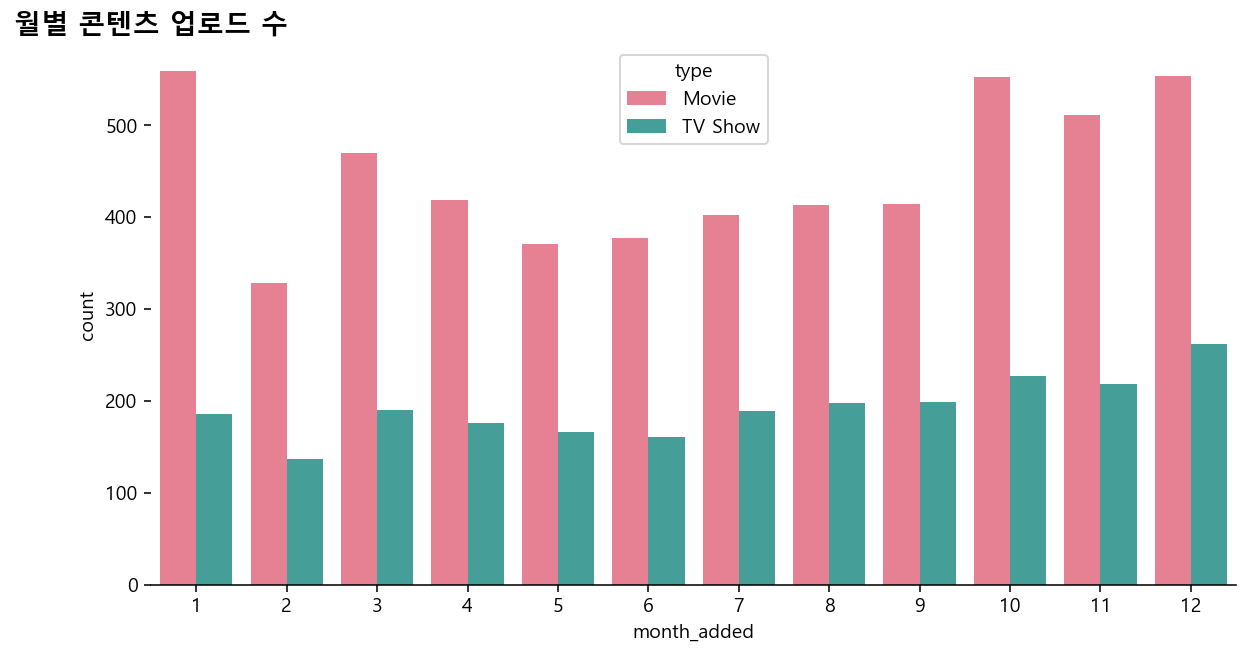

In [92]:
plt.figure(figsize=(10,5))
sns.countplot(x='month_added', hue='type', data=df, palette='husl')
sns.despine(left=True)
plt.title('월별 콘텐츠 업로드 수', fontsize=14, fontweight='bold', position=(0, 0))
plt.show()

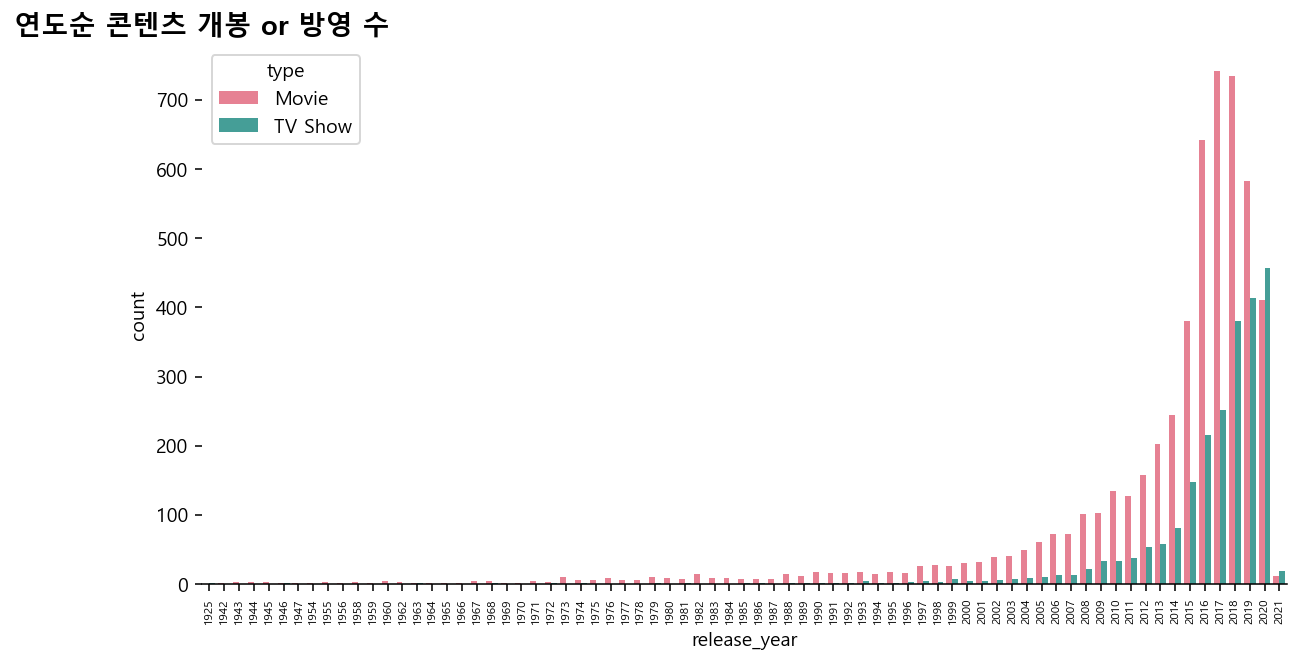

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(x='release_year', hue='type', data=df, palette='husl')
sns.despine(left=True)
plt.title('연도순 콘텐츠 개봉 or 방영 수', fontsize=14, fontweight='bold', position=(0, 0))
plt.xticks(rotation=90, fontsize=6)
plt.show()